
# **Problem statement: Booking Cancelation Status Prediction Problem**

**Cancelation status prediction for hotel bookings**:

From the given data of hotel bookings of a particular hotel, we should able to find whether a resident will cancel the booking or not. 

Implementing a binary classifier with the details of lead time,  agent, customer type, etc will help us to predict the cancelation status.

**Type:** Binary Classification

In [ ]:
# STEP 1: Importing Libraries

In [ ]:
# STEP 2: Loading nd Analyzing data

In [ ]:
# STEP 3: Data Visualization

In [ ]:
# STEP 4: Data Pre-processing

In [ ]:
# STEP 5: Encoding

In [ ]:
# STEP 6: Splitting Data into X variable and Target y variable

In [ ]:
# STEP 7: Implemeting Models 

### **Importing Libraries**

In [ ]:
# Basic and most important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

# Model evaluation tools
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

### **Analyzing Data**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [ ]:
# Shape of the data
data.shape

(119390, 32)

In [ ]:
# Data Types
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# Statistical information of the dataframe
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Complete information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Data Visualization**

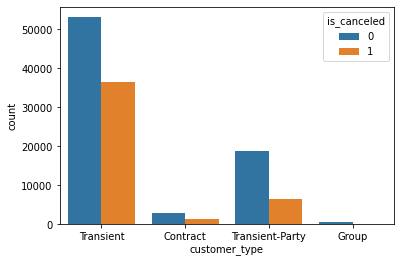

In [ ]:
# Relation between customer_type and is_canceled
sns.countplot(x="customer_type",hue="is_canceled",data=data)

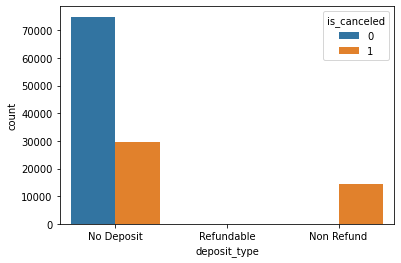

In [ ]:
# Relation between deposit_type and is_canceled
sns.countplot(x="deposit_type",hue="is_canceled",data=data)

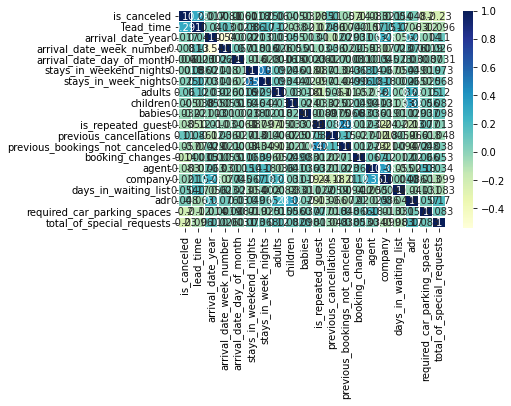

In [ ]:
# Creating correlation matrix
correlation_mat = data.corr()
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")



From the correlation matrix we can find positive correlation between 
*   Lead_time and is_canceled
*   adr and adults
*   agent and company
*   is_repeated_guests and previous_bookings_not_canceled



In [ ]:
# Pair plot
sns.pairplot(data)
plt.show()

### **Checking for missing values**

In [ ]:
data.isnull().sum()

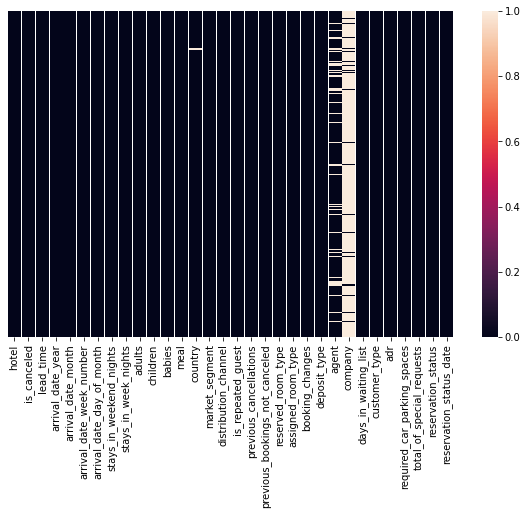

In [ ]:
# Heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

### **Dealing with null values**

In [ ]:
# As there are are more null values in company we are dropping it
data.drop("company", axis=1,inplace=True)

In [ ]:
data["agent"].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [ ]:
data["country"].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
# Replacing Nan with median for numerical data and median with categorial data

data["agent"].replace(np.nan, data["agent"].median(), inplace=True)

data["country"].replace(np.nan, data["country"].mode().values[0], inplace=True)

data["children"].replace(np.nan, data["children"].median(), inplace=True)

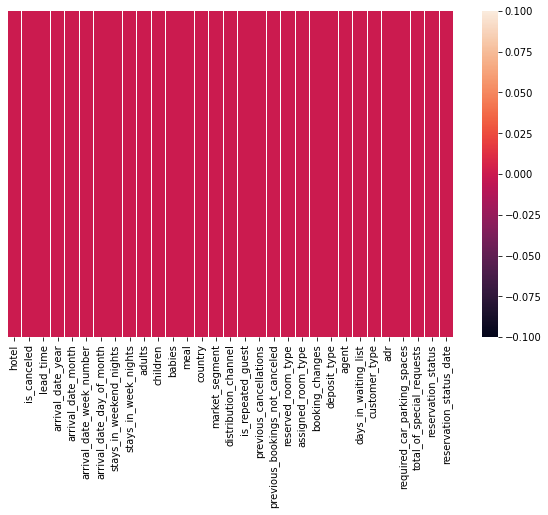

In [ ]:
# Verifying dataframe 

plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

### **Encoding**

In [ ]:
# Creating dummies for categorial data

data["hotel"] = le.fit_transform(data["hotel"])
data["arrival_date_month"] = le.fit_transform(data["arrival_date_month"])
data["meal"] = le.fit_transform(data["meal"])
data["country"] = le.fit_transform(data["country"])
data["market_segment"] = le.fit_transform(data["market_segment"])
data["distribution_channel"] = le.fit_transform(data["distribution_channel"])
data["reserved_room_type"] = le.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = le.fit_transform(data["assigned_room_type"])
data["deposit_type"] = le.fit_transform(data["deposit_type"])
data["customer_type"] = le.fit_transform(data["customer_type"])
data["reservation_status"] = le.fit_transform(data["reservation_status"])
data["reservation_status_date"] = le.fit_transform(data["reservation_status_date"])

In [ ]:
data.head(5)

### **Splitting data into Input X Variable and Target y variables**

In [ ]:
X = data.drop(["is_canceled"], axis=1)
y = data["is_canceled"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### **Regression Model**

In [ ]:
# Building Model
model1=LogisticRegression(solver="liblinear")

In [ ]:
model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model1.score(X_train,y_train)

0.9899967692915176

In [ ]:
model1.score(X_test,y_test)

0.9891392355585337

### **KNN Model**

In [ ]:
# Building KNN model
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(X_test)
accuracy_score(y_test, y_pred)

0.8806153502526733

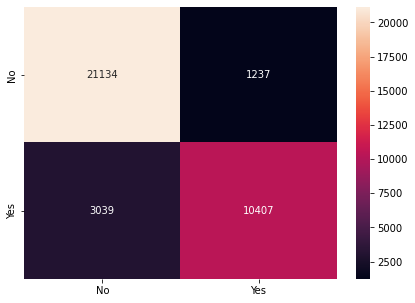

In [ ]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **Decision Tree**

In [ ]:
# Building Model
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_train,y_train)

1.0

In [ ]:
dtree.score(X_test,y_test)

1.0

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

1.0


In [ ]:
y_predict = dTreeR.predict(X_test)

In [ ]:
print(dTreeR.score(X_test, y_test))

1.0


In [ ]:
from sklearn import metrics

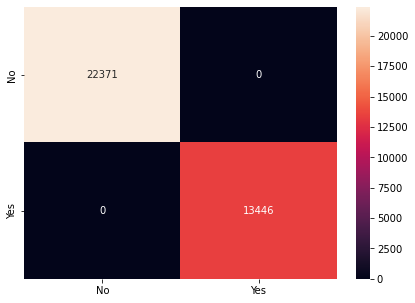

In [ ]:
# Confusion matrix 

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(X_train,y_train)
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

1.0


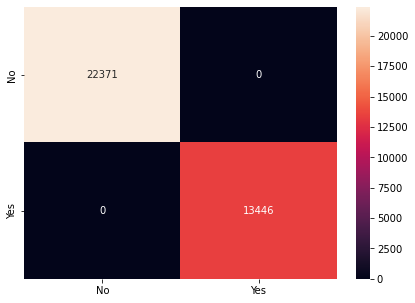

In [ ]:
# Confusion Matrix

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


### **Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(X_train, y_train)
y_predict = abcl.predict(X_test)
print(abcl.score(X_test, y_test))

1.0


### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

1.0


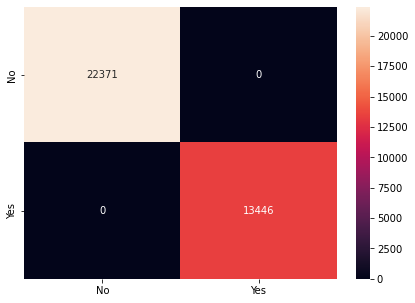

In [ ]:
# Confusion Matrix for Gradient Boosting
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_test, y_test))

0.9970125917860234


0.9970125917860234


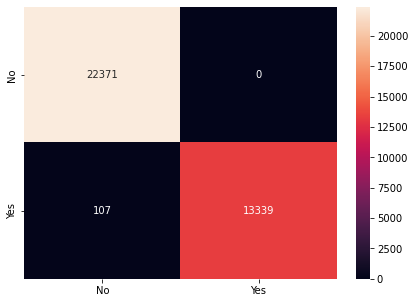

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **Gaussian Naive Bayes Model**

In [ ]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9932155121869504

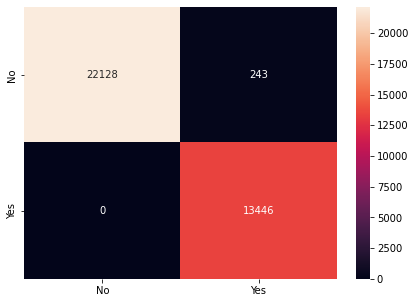

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### **SVM Model**

In [ ]:
SVM = SVC(kernel = 'linear', random_state = 0)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
accuracy_score(y_test, y_pred)

0.9893067537761399

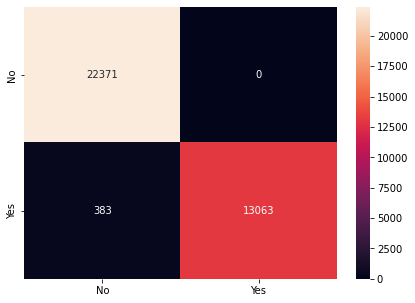

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')